<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Churn Modeling</h3>
</div>

<img src = "https://slitayem.github.io/img/blog/2020-08-04/churn.png" width=50%>

======================================================================================================================

## Importing the libraries

In [812]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, IsolationForest
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from sklearn.utils.class_weight import compute_sample_weight

## Load DataSet

In [356]:
Churn_data = pd.read_csv("Churn.csv")

## Exploratory Data Analysis (EDA)

In [359]:
Churn_data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [361]:
Churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [363]:
X = Churn_data.iloc[:,3:-1]
y = Churn_data.iloc[:,-1]

### Visualization

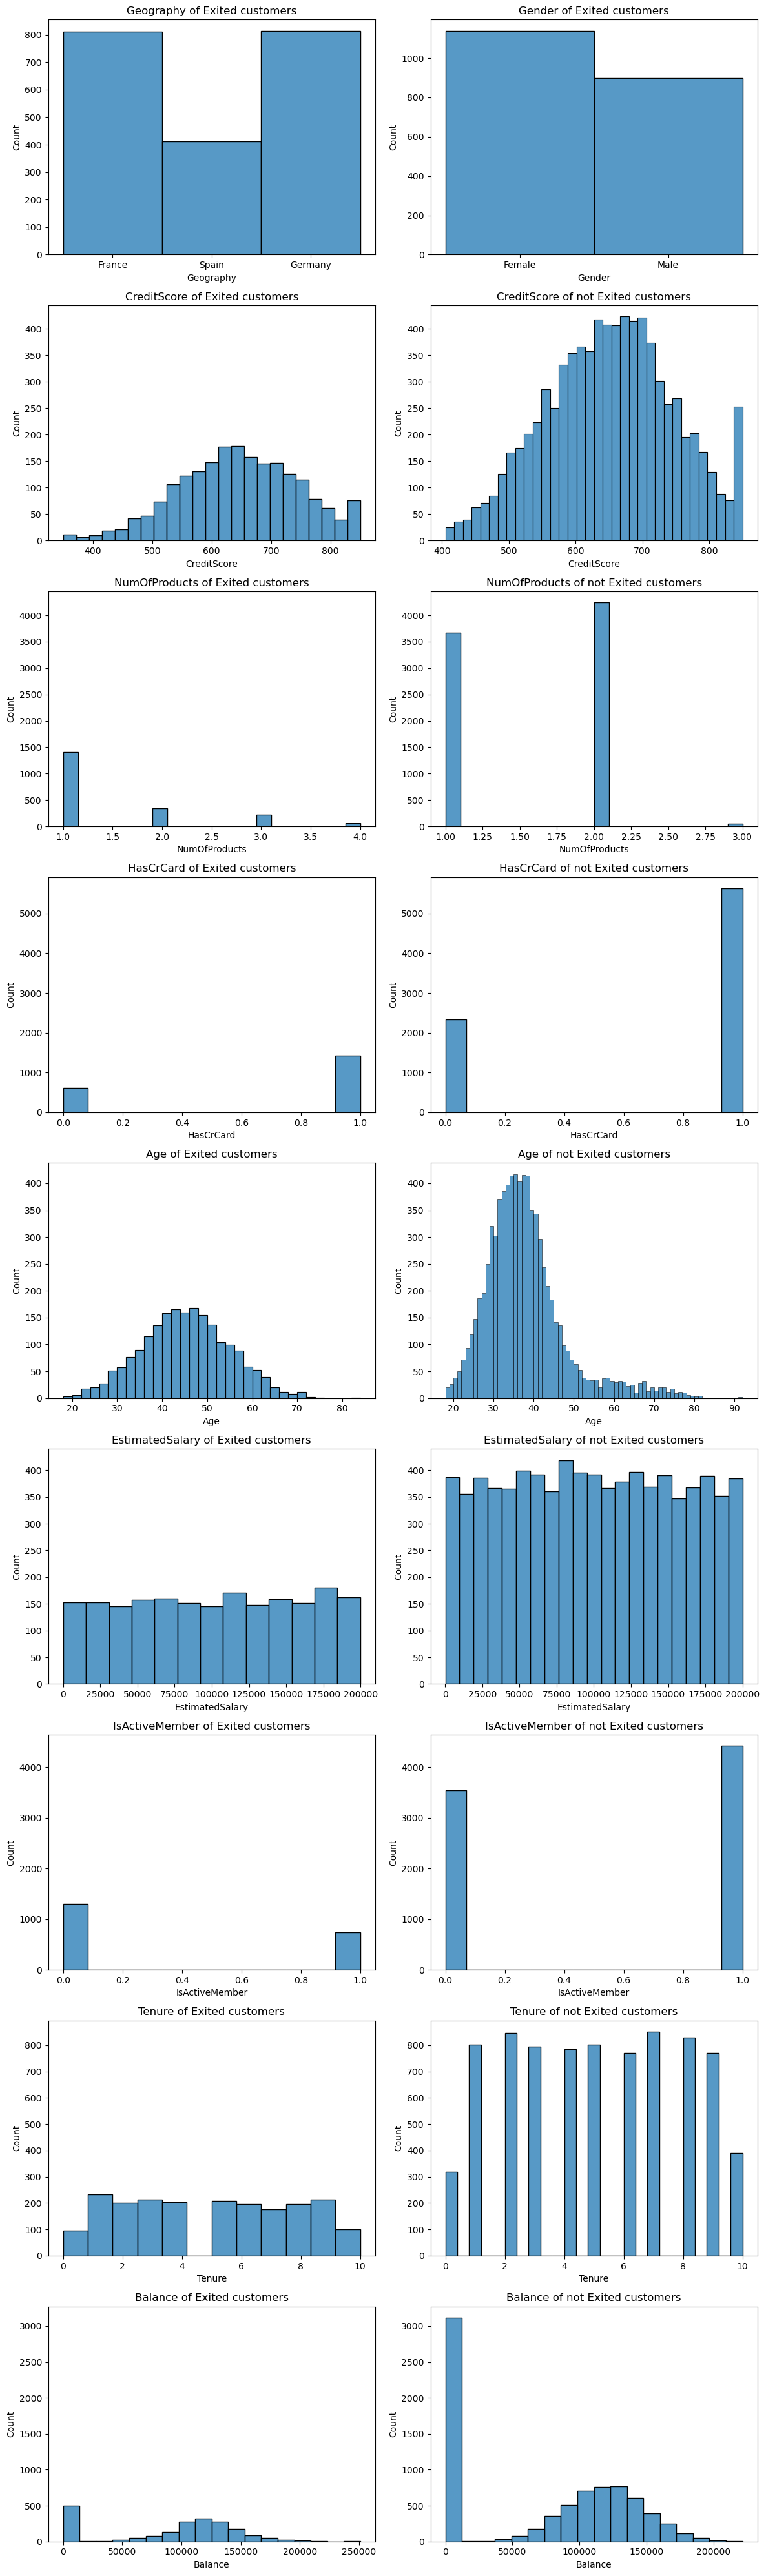

In [366]:
(fig, axes) = plt.subplots(9,2, figsize= (12,40))
#----
sns.histplot(Churn_data.loc[Churn_data["Exited"]==1]["Geography"], ax = axes[0,0])
axes[0,0].set_title("Geography of Exited customers")

#----
sns.histplot(Churn_data.loc[Churn_data["Exited"]==1]["Gender"], ax = axes[0,1])
axes[0,1].set_title("Gender of Exited customers")

#----
sns.histplot(Churn_data.loc[Churn_data["Exited"]==1]["CreditScore"], ax = axes[1,0])
axes[1,0].set_title("CreditScore of Exited customers")

sns.histplot(Churn_data.loc[Churn_data["Exited"]==0]["CreditScore"], ax = axes[1,1])
axes[1,1].set_title("CreditScore of not Exited customers")

# Get the maximum y-axis value from both plots
y_max = max(axes[1, 0].get_ylim()[1], axes[1, 1].get_ylim()[1])

# Set the same y-axis range for both subplots
axes[1, 0].set_ylim(0, y_max)
axes[1, 1].set_ylim(0, y_max)

#----
sns.histplot(Churn_data.loc[Churn_data["Exited"]==1]["NumOfProducts"], ax = axes[2,0])
axes[2,0].set_title("NumOfProducts of Exited customers")

sns.histplot(Churn_data.loc[Churn_data["Exited"]==0]["NumOfProducts"], ax = axes[2,1])
axes[2,1].set_title("NumOfProducts of not Exited customers")

# Get the maximum y-axis value from both plots
y_max = max(axes[2, 0].get_ylim()[1], axes[2, 1].get_ylim()[1])

# Set the same y-axis range for both subplots
axes[2, 0].set_ylim(0, y_max)
axes[2, 1].set_ylim(0, y_max)

#----
sns.histplot(Churn_data.loc[Churn_data["Exited"]==1]["HasCrCard"], ax = axes[3,0])
axes[3,0].set_title("HasCrCard of Exited customers")

sns.histplot(Churn_data.loc[Churn_data["Exited"]==0]["HasCrCard"], ax = axes[3,1])
axes[3,1].set_title("HasCrCard of not Exited customers")

# Get the maximum y-axis value from both plots
y_max = max(axes[3, 0].get_ylim()[1], axes[3, 1].get_ylim()[1])

# Set the same y-axis range for both subplots
axes[3, 0].set_ylim(0, y_max)
axes[3, 1].set_ylim(0, y_max)

#----
sns.histplot(Churn_data.loc[Churn_data["Exited"]==1]["Age"], ax = axes[4,0])
axes[4,0].set_title("Age of Exited customers")

sns.histplot(Churn_data.loc[Churn_data["Exited"]==0]["Age"], ax = axes[4,1])
axes[4,1].set_title("Age of not Exited customers")

# Get the maximum y-axis value from both plots
y_max = max(axes[4, 0].get_ylim()[1], axes[4, 1].get_ylim()[1])

# Set the same y-axis range for both subplots
axes[4, 0].set_ylim(0, y_max)
axes[4, 1].set_ylim(0, y_max)

#----
sns.histplot(Churn_data.loc[Churn_data["Exited"]==1]["EstimatedSalary"], ax = axes[5,0])
axes[5,0].set_title("EstimatedSalary of Exited customers")

sns.histplot(Churn_data.loc[Churn_data["Exited"]==0]["EstimatedSalary"], ax = axes[5,1])
axes[5,1].set_title("EstimatedSalary of not Exited customers")

# Get the maximum y-axis value from both plots
y_max = max(axes[5, 0].get_ylim()[1], axes[5, 1].get_ylim()[1])

# Set the same y-axis range for both subplots
axes[5, 0].set_ylim(0, y_max)
axes[5, 1].set_ylim(0, y_max)

#----
sns.histplot(Churn_data.loc[Churn_data["Exited"]==1]["IsActiveMember"], ax = axes[6,0])
axes[6,0].set_title("IsActiveMember of Exited customers")

sns.histplot(Churn_data.loc[Churn_data["Exited"]==0]["IsActiveMember"], ax = axes[6,1])
axes[6,1].set_title("IsActiveMember of not Exited customers")

# Get the maximum y-axis value from both plots
y_max = max(axes[6, 0].get_ylim()[1], axes[6, 1].get_ylim()[1])

# Set the same y-axis range for both subplots
axes[6, 0].set_ylim(0, y_max)
axes[6, 1].set_ylim(0, y_max)

#----
sns.histplot(Churn_data.loc[Churn_data["Exited"]==1]["Tenure"], ax = axes[7,0])
axes[7,0].set_title("Tenure of Exited customers")

sns.histplot(Churn_data.loc[Churn_data["Exited"]==0]["Tenure"], ax = axes[7,1])
axes[7,1].set_title("Tenure of not Exited customers")

# Get the maximum y-axis value from both plots
y_max = max(axes[7, 0].get_ylim()[1], axes[7, 1].get_ylim()[1])

# Set the same y-axis range for both subplots
axes[7, 0].set_ylim(0, y_max)
axes[7, 1].set_ylim(0, y_max)

#----
sns.histplot(Churn_data.loc[Churn_data["Exited"]==1]["Balance"], ax = axes[8,0])
axes[8,0].set_title("Balance of Exited customers")

sns.histplot(Churn_data.loc[Churn_data["Exited"]==0]["Balance"], ax = axes[8,1])
axes[8,1].set_title("Balance of not Exited customers")

# Get the maximum y-axis value from both plots
y_max = max(axes[8, 0].get_ylim()[1], axes[8, 1].get_ylim()[1])

# Set the same y-axis range for both subplots
axes[8, 0].set_ylim(0, y_max)
axes[8, 1].set_ylim(0, y_max)


plt.tight_layout()
plt.show()

# Machine Learning Models


## Prepare Data for Machine learning

In [368]:
X = Churn_data.iloc[:,3:-1]
y = Churn_data.iloc[:,-1]

# by using LabelEncoder, the "Geography" and "Gender" columns are transformed to values
le = LabelEncoder()
X[X.columns[1]] = le.fit_transform(X.iloc[:,1])
X[X.columns[2]] = le.fit_transform(X.iloc[:,2])

In [806]:
# check wether the data is balanced or not -- > 1 or < 1 shows imbalance 
len(y[y == 0]) / len(y[y == 1])

3.9091801669121256

## Train and Test split

In [617]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# data is normalized 
ss = StandardScaler()
X_train_N = ss.fit_transform(X_train)
X_test_N = ss.transform(X_test)

## SMOTE

In [622]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# data is normalized 
ss = StandardScaler()
X_train_smote_N = ss.fit_transform(X_train_smote)
X_test_smote_N = ss.transform(X_test)

## Over Sampling

In [624]:
# Random Over-Sampling
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# data is normalized 
ss = StandardScaler()
X_train_ros_N = ss.fit_transform(X_train_ros)
X_test_ros_N = ss.transform(X_test)

## Under Sampling

In [626]:
# Random Under-Sampling
rus = RandomUnderSampler(random_state=42, sampling_strategy=0.5)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# data is normalized 
ss = StandardScaler()
X_train_rus_N = ss.fit_transform(X_train_rus)
X_test_rus_N = ss.transform(X_test)

# Prediction Models

## GradientBoosting Classifier

In [775]:
# Compute sample weights
sample_weights = compute_sample_weight('balanced', y_train)

# Initialize the classifier
gb_classifier = GradientBoostingClassifier()

# Train the model on the training data
gb_classifier.fit(X_train, y_train, sample_weight=sample_weights)

# Predict on the test data
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
print("Classification Report for Gradient Boosting:\n")
print(classification_report(y_test, y_pred))


Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

           0       0.94      0.80      0.86      1607
           1       0.49      0.78      0.60       393

    accuracy                           0.80      2000
   macro avg       0.71      0.79      0.73      2000
weighted avg       0.85      0.80      0.81      2000



## GradientBoosting Classifier with SMOTE

In [472]:
# Initialize the classifier
gb_classifier = GradientBoostingClassifier()

# Train the model on the training data
gb_classifier.fit(X_train_smote, y_train_smote)

# Predict on the test data
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
print("Classification Report for Gradient Boosting with SMOTE:\n")
print(classification_report(y_test, y_pred))


Classification Report for Gradient Boosting with SMOTE:

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1607
           1       0.52      0.71      0.60       393

    accuracy                           0.81      2000
   macro avg       0.72      0.77      0.74      2000
weighted avg       0.84      0.81      0.82      2000



## GradientBoosting Classifier with OverSampling

In [475]:
# Initialize the classifier
gb_classifier = GradientBoostingClassifier()

# Train the model on the training data
gb_classifier.fit(X_train_ros, y_train_ros)

# Predict on the test data
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
print("Classification Report for Gradient Boosting with OverSampling:")
print(classification_report(y_test, y_pred))


Classification Report for Gradient Boosting with OverSampling:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1607
           1       0.50      0.78      0.61       393

    accuracy                           0.80      2000
   macro avg       0.72      0.80      0.74      2000
weighted avg       0.85      0.80      0.82      2000



## GradientBoosting Classifier with UnderSampling

In [478]:
# Initialize the classifier
gb_classifier = GradientBoostingClassifier()

# Train the model on the training data
gb_classifier.fit(X_train_rus, y_train_rus)

# Predict on the test data
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
print("Classification Report for Gradient Boosting with UnderSampling:")
print(classification_report(y_test, y_pred))


Classification Report for Gradient Boosting with UnderSampling:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1607
           1       0.64      0.62      0.63       393

    accuracy                           0.86      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.85      0.86      0.86      2000



## XGBoost classifier

In [770]:
# Calculate scale_pos_weight value
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)

# Initialize the classifier
xgb = XGBClassifier(scale_pos_weight=scale_pos_weight)

# Train the model on the training data
xgb.fit(X_train,y_train)

# Predict the classes related to X_test
y_pred = xgb.predict(X_test)

print(f"\nclassification report acheived by XGBoost equals:")

# Calculate the classification metrics
report = sklearn.metrics.classification_report(y_test, y_pred)

# Print the classification report
print(report)


classification report acheived by XGBoost equals:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1607
           1       0.55      0.65      0.60       393

    accuracy                           0.83      2000
   macro avg       0.73      0.76      0.75      2000
weighted avg       0.84      0.83      0.83      2000



## XGBoost classifier with SMOTE

In [484]:
# Initialize the classifier
xgb = XGBClassifier()

# Train the model on the training data
xgb.fit(X_train_smote,y_train_smote)

# Predict the classes related to X_test
y_pred = xgb.predict(X_test)

print(f"\nclassification report acheived by XGBoost with SMOTE equals:")

# Calculate the classification metrics
report = sklearn.metrics.classification_report(y_test, y_pred)

# Print the classification report
print(report)


classification report acheived by XGBoost with SMOTE equals:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1607
           1       0.53      0.65      0.58       393

    accuracy                           0.82      2000
   macro avg       0.72      0.75      0.73      2000
weighted avg       0.83      0.82      0.82      2000



## XGBoost classifier with OverSampling

In [487]:
# Initialize the classifier
xgb = XGBClassifier()

# Train the model on the training data
xgb.fit(X_train_ros,y_train_ros)

# Predict the classes related to X_test
y_pred = xgb.predict(X_test)

print(f"\nclassification report acheived by XGBoost with OverSampling equals:")

# Calculate the classification metrics
report = sklearn.metrics.classification_report(y_test, y_pred)

# Print the classification report
print(report)


classification report acheived by XGBoost with OverSampling equals:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      1607
           1       0.56      0.63      0.59       393

    accuracy                           0.83      2000
   macro avg       0.73      0.75      0.74      2000
weighted avg       0.84      0.83      0.83      2000



## XGBoost classifier with UnderSampling

In [490]:
# Initialize the classifier
xgb = XGBClassifier()

# Train the model on the training data
xgb.fit(X_train_rus,y_train_rus)

# Predict the classes related to X_test
y_pred = xgb.predict(X_test)

print(f"\nclassification report acheived by XGBoost with UnderSampling equals:")

# Calculate the classification metrics
report = sklearn.metrics.classification_report(y_test, y_pred)

# Print the classification report
print(report)


classification report acheived by XGBoost with UnderSampling equals:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1607
           1       0.57      0.64      0.60       393

    accuracy                           0.83      2000
   macro avg       0.74      0.76      0.75      2000
weighted avg       0.84      0.83      0.84      2000



## AdaBoost Classifier

In [778]:
# Compute sample weights
sample_weights = compute_sample_weight('balanced', y_train)

# Initialize the classifier
Ada = AdaBoostClassifier(algorithm='SAMME')

# Train the model on the training data
Ada.fit(X_train, y_train, sample_weight=sample_weights)

# Predict the classes related to X_test
y_pred = Ada.predict(X_test)

print(f"\nclassification report acheived by AdaBoost equals:")

# Calculate the classification metrics
report = sklearn.metrics.classification_report(y_test, y_pred)

# Print the classification report
print(report)


classification report acheived by AdaBoost equals:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      1607
           1       0.48      0.79      0.60       393

    accuracy                           0.79      2000
   macro avg       0.71      0.79      0.73      2000
weighted avg       0.85      0.79      0.81      2000



## AdaBoost Classifier with SMOTE

In [496]:
# Initialize the classifier
Ada = AdaBoostClassifier(algorithm='SAMME')

# Train the model on the training data
Ada.fit(X_train_smote, y_train_smote)

# Predict the classes related to X_test
y_pred = Ada.predict(X_test)

print(f"\nclassification report acheived by AdaBoost with SMOTE equals:")

# Calculate the classification metrics
report = sklearn.metrics.classification_report(y_test, y_pred)

# Print the classification report
print(report)


classification report acheived by AdaBoost with SMOTE equals:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1607
           1       0.49      0.71      0.58       393

    accuracy                           0.80      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.80      0.81      2000



## AdaBoost Classifier with OverSampling

In [499]:
# Initialize the classifier
Ada = AdaBoostClassifier(algorithm='SAMME')

# Train the model on the training data
Ada.fit(X_train_ros, y_train_ros)

# Predict the classes related to X_test
y_pred = Ada.predict(X_test)

print(f"\nclassification report acheived by AdaBoost with OverSampling equals:")

# Calculate the classification metrics
report = sklearn.metrics.classification_report(y_test, y_pred)

# Print the classification report
print(report)


classification report acheived by AdaBoost with OverSampling equals:
              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1607
           1       0.46      0.76      0.57       393

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.71      2000
weighted avg       0.84      0.78      0.80      2000



## AdaBoost Classifier with UnderSampling

In [502]:
# Initialize the classifier
Ada = AdaBoostClassifier(algorithm='SAMME')

# Train the model on the training data
Ada.fit(X_train_rus, y_train_rus)

# Predict on the test data
y_pred = Ada.predict(X_test)

print(f"\nclassification report acheived by AdaBoost with UnderSampling equals:")

# Calculate the classification metrics
report = sklearn.metrics.classification_report(y_test, y_pred)

# Print the classification report
print(report)


classification report acheived by AdaBoost with UnderSampling equals:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1607
           1       0.59      0.62      0.60       393

    accuracy                           0.84      2000
   macro avg       0.75      0.76      0.75      2000
weighted avg       0.84      0.84      0.84      2000



## RandomForest Classifier

In [796]:
# Initialize the classifier
RFC = RandomForestClassifier(class_weight='balanced')

# Train the model on the training data
RFC.fit(X_train, y_train)

# Predict on the test data
y_pred = RFC.predict(X_test)

print(f"\nclassification report acheived by RandomForest equals:")

# Calculate the classification metrics
report = sklearn.metrics.classification_report(y_test, y_pred)

# Print the classification report
print(report)


classification report acheived by RandomForest equals:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.79      0.45      0.57       393

    accuracy                           0.87      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



## RandomForest Classifier with SMOTE

In [508]:
# Initialize the classifier
RFC = RandomForestClassifier()

# Train the model on the training data
RFC.fit(X_train_smote, y_train_smote)

# Predict on the test data
y_pred = RFC.predict(X_test)

print(f"\nclassification report acheived by RandomForest with SMOTE equals:")

# Calculate the classification metrics
report = sklearn.metrics.classification_report(y_test, y_pred)

# Print the classification report
print(report)


classification report acheived by RandomForest with SMOTE equals:
              precision    recall  f1-score   support

           0       0.91      0.86      0.89      1607
           1       0.54      0.66      0.59       393

    accuracy                           0.82      2000
   macro avg       0.72      0.76      0.74      2000
weighted avg       0.84      0.82      0.83      2000



## RandomForest Classifier with OverSampling

In [511]:
# Initialize the classifier
rf_model = RandomForestClassifier()

# Train the model on the training data
rf_model.fit(X_ros, y_ros)

# Predict on the test set
y_pred = rf_model.predict(X_test)

print(f"\nclassification report acheived by RandomForest with Over-Sampling equals:\n")

# Calculate and print the classification metrics
print(classification_report(y_test, y_pred))


classification report acheived by RandomForest with Over-Sampling equals:

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.68      0.53      0.60       393

    accuracy                           0.86      2000
   macro avg       0.78      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



## RandomForest Classifier with Under-Sampling

In [514]:
# Initialize the classifier
rf_model = RandomForestClassifier()

# Train the model on the training data
rf_model.fit(X_rus, y_rus)

# Predict on the test set
y_pred = rf_model.predict(X_test)

print(f"\nclassification report acheived by RandomForest with Under-Sampling equals:\n")

# Calculate and print the classification metrics
print(classification_report(y_test, y_pred))


classification report acheived by RandomForest with Under-Sampling equals:

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1607
           1       0.62      0.61      0.61       393

    accuracy                           0.85      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.85      0.85      0.85      2000



## LGBM Classifier

In [748]:
# Initialize the classifier
lgbm = LGBMClassifier(class_weight='balanced')

# Train the model on the training data
lgbm.fit(X_train, y_train)

# Predict on the test set
y_pred = lgbm.predict(X_test)

print(f"\nclassification report acheived by LGBM equals:\n")

# Calculate and print the classification metrics
print(classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000

classification report acheived by LGBM equals:

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1607
           1       0.53      0.75      0.62       393

    accuracy                           0.82      2000
   macro avg       0.73      0.79      0.75      2000
weighted avg       0.85      0.82      0.83      2000



## LGBM Classifier with SMOTE

In [730]:
# Initialize the classifier
lgbm = LGBMClassifier()

# Train the model on the training data
lgbm.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = lgbm.predict(X_test)

print(f"\nclassification report acheived by LGBM with SMOTE equals:\n")

# Calculate and print the classification metrics
print(classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 6356, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 855
[LightGBM] [Info] Number of data points in the train set: 12712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

classification report acheived by LGBM with SMOTE equals:

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1607
           1       0.53      0.69      0.60       393

    accuracy                           0.82      2000
   macro avg       0.72      0.77      0.74      2000
weighted avg       0.84      0.82      0.83      2000



## LGBM Classifier with Over-Sampling

In [738]:
# Initialize the classifier
lgbm = LGBMClassifier()

# Train the model on the training data
lgbm.fit(X_train_ros, y_train_ros)

# Predict on the test data
y_pred = lgbm.predict(X_test)

print(f"\nclassification report acheived by LGBM with Over-Sampling equals:\n")

# Calculate and print the classification metrics
print(classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 6356, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 12712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

classification report acheived by LGBM with Over-Sampling equals:

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1607
           1       0.52      0.70      0.60       393

    accuracy                           0.81      2000
   macro avg       0.72      0.77      0.74      2000
weighted avg       0.84      0.81      0.82      2000



## LGBM Classifier with Under-Sampling

In [740]:
# Initialize the classifier
lgbm = LGBMClassifier()

# Train the model on the training data
lgbm.fit(X_train_rus, y_train_rus)

# Predict on the test data
y_pred = lgbm.predict(X_test)

print(f"\nclassification report acheived by LGBM with Under-Sampling equals:\n")

# Calculate and print the classification metrics
print(classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 1644, number of negative: 3288
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000968 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 853
[LightGBM] [Info] Number of data points in the train set: 4932, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147

classification report acheived by LGBM with Under-Sampling equals:

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1607
           1       0.61      0.64      0.62       393

    accuracy                           0.85      2000
   macro avg       0.76      0.77      0.76      2000
weighted avg       0.85      0.85      0.85      2000



## CatBoost Classifier

In [663]:
# Initialize the classifier
catboost = CatBoostClassifier(class_weights={0:1, 1:4}, verbose=0)

# Train the model on the training data
catboost.fit(X_train, y_train)

# Predict on the test data
y_pred = catboost.predict(X_test)

print(f"\nclassification report acheived by CatBoost equals:\n")

# Calculate and print the classification metrics
print(classification_report(y_test, y_pred))



classification report acheived by CatBoost equals:

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1607
           1       0.53      0.73      0.62       393

    accuracy                           0.82      2000
   macro avg       0.73      0.79      0.75      2000
weighted avg       0.85      0.82      0.83      2000



## CatBoost Classifier with SMOTE

In [765]:
# Initialize the classifier
catboost = CatBoostClassifier(verbose=0)

# Train the model on the training data
catboost.fit(X_train_smote, y_train_smote)

# Predict on the test data
y_pred = catboost.predict(X_test)

print(f"\nclassification report acheived by CatBoost with SMOTE equals:\n")

# Calculate and print the classification metrics
print(classification_report(y_test, y_pred))



classification report acheived by CatBoost with SMOTE equals:

              precision    recall  f1-score   support

           0       0.91      0.86      0.89      1607
           1       0.54      0.67      0.59       393

    accuracy                           0.82      2000
   macro avg       0.73      0.76      0.74      2000
weighted avg       0.84      0.82      0.83      2000



## CatBoost Classifier with Over-Sampling

In [679]:
# Initialize the classifier
catboost = CatBoostClassifier(verbose=0)

# Train the model on the training data
catboost.fit(X_train_ros, y_train_ros)

# Predict on the test data
y_pred = catboost.predict(X_test)

print(f"\nclassification report acheived by CatBoost with Over-Sampling equals:\n")

# Calculate and print the classification metrics
print(classification_report(y_test, y_pred))



classification report acheived by CatBoost with Over-Sampling equals:

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1607
           1       0.55      0.70      0.62       393

    accuracy                           0.83      2000
   macro avg       0.74      0.78      0.75      2000
weighted avg       0.85      0.83      0.84      2000



## CatBoost Classifier with Under-Sampling

In [681]:
# Initialize the classifier
catboost = CatBoostClassifier(verbose=0)

# Train the model on the training data
catboost.fit(X_train_rus, y_train_rus)

# Predict on the test data
y_pred = catboost.predict(X_test)

print(f"\nclassification report acheived by CatBoost with Under-Sampling equals:\n")

# Calculate and print the classification metrics
print(classification_report(y_test, y_pred))



classification report acheived by CatBoost with Under-Sampling equals:

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1607
           1       0.62      0.62      0.62       393

    accuracy                           0.85      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.85      0.85      0.85      2000



## Anomaly Detection Algorithms

Treat the minority class as anomalies and use anomaly detection algorithms.

In [517]:
# Initialize the model
iso_forest = IsolationForest(random_state=42)

iso_forest.fit(X_train)

# Predict on the test set
y_pred = iso_forest.predict(X_test)
y_pred = [1 if x == -1 else 0 for x in y_pred]  # Assuming class 1 is the anomaly class

# Evaluate the model
print("Isolation Forest")
print(classification_report(y_test, y_pred))


Isolation Forest
              precision    recall  f1-score   support

           0       0.86      0.32      0.47      1607
           1       0.22      0.79      0.34       393

    accuracy                           0.41      2000
   macro avg       0.54      0.55      0.41      2000
weighted avg       0.73      0.41      0.44      2000



## SVM classifier

In [630]:
# Initialize the classifier
svc = SVC(class_weight =  {0: 1, 1: 4} )

# Train the model on the training data
svc.fit(X_train_N, y_train)

# Predict on the test data
y_pred = svc.predict(X_test_N)

print(f"\nclassification report acheived by SVM equals: \n")

# Calculate the classification metrics
report = sklearn.metrics.classification_report(y_test, y_pred)

# Print the classification report
print(report)


classification report acheived by SVM equals: 

              precision    recall  f1-score   support

           0       0.93      0.77      0.85      1607
           1       0.45      0.77      0.57       393

    accuracy                           0.77      2000
   macro avg       0.69      0.77      0.71      2000
weighted avg       0.84      0.77      0.79      2000



## SVM with SMOTE

In [717]:
# Initialize the classifier
svc = SVC()

# Train the model on the training data
svc.fit(X_train_smote_N, y_train_smote)

# Predict on the test data
y_pred = svc.predict(X_test_smote_N)

print(f"\nclassification report acheived by SVM and SMOTE equals:")

# Calculate the classification metrics
report = sklearn.metrics.classification_report(y_test, y_pred)

# Print the classification report
print(report)


classification report acheived by SVM and SMOTE equals:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1607
           1       0.50      0.66      0.57       393

    accuracy                           0.81      2000
   macro avg       0.71      0.75      0.72      2000
weighted avg       0.83      0.81      0.81      2000



### SVM with Over-Sampling

In [711]:
# Initialize the classifier
svc = SVC()

# Train the model on the training data
svc.fit(X_train_ros_N, y_train_ros)

# Predict on the test data
y_pred = svc.predict(X_test_ros_N)

print(f"\nclassification report acheived by SVM and Over-Sampling equals:")

# Calculate the classification metrics
report = sklearn.metrics.classification_report(y_test, y_pred)

# Print the classification report
print(report)


classification report acheived by SVM and Over-Sampling equals:
              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1607
           1       0.46      0.77      0.58       393

    accuracy                           0.78      2000
   macro avg       0.70      0.78      0.72      2000
weighted avg       0.84      0.78      0.80      2000



### SVM with Under-Sampling

In [712]:
# Initialize the classifier
svc = SVC()

# Train the model on the training data
svc.fit(X_train_rus_N, y_train_rus)

# Predict on the test data
y_pred = svc.predict(X_test_rus_N)

print(f"\nclassification report acheived by SVM and Under-Sampling equals:")

# Calculate the classification metrics
report = sklearn.metrics.classification_report(y_test, y_pred)

# Print the classification report
print(report)


classification report acheived by SVM and Under-Sampling equals:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1607
           1       0.66      0.56      0.61       393

    accuracy                           0.86      2000
   macro avg       0.78      0.75      0.76      2000
weighted avg       0.85      0.86      0.85      2000

